In this colab notebook, you will find:
- the implementation of the linear regression on datasets found in the project's Google Drive
- the implementation of the polynomial regression on datasets found in the project's Google Drive

/!\ To generate a new dataset, use the _creation_tajectoires_aleatoires.py_ program, which can be found in the CODE directory of the project's Google Drive.




# **Import modules and training dataset**

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [139]:
#link: https://drive.google.com/file/d/1RpYPkgm6EdXnewjbkWYwd7v10e3lCwdN/view?usp=sharing
!gdown 1RpYPkgm6EdXnewjbkWYwd7v10e3lCwdN

Downloading...
From: https://drive.google.com/uc?id=1RpYPkgm6EdXnewjbkWYwd7v10e3lCwdN
To: /content/dataset_10k.csv
100% 1.14M/1.14M [00:00<00:00, 57.0MB/s]


In [141]:
data= pd.read_csv("dataset_10k.csv")


In [142]:
data.tail()

,Xreel,Yreel,Zreel,Xbruit,Ybruit,Zbruit
9996,2.533302,6.184788,443.445648,2.575944,6.206826,443.498336
9997,2.533414,6.222352,443.488545,2.678837,6.071691,443.708226
9998,2.601793,6.180547,443.502106,2.557520,6.291112,443.492029
9999,2.551510,6.202452,443.527042,2.639761,6.304779,443.420580
10000,2.521465,6.133108,443.567827,2.636933,6.339540,443.550240


# **Dataset for test**
This dataset is used to test models with a trajectory closer to reality.

In [ ]:
#link: https://drive.google.com/file/d/1SOvOyhofDAJgCji3kgdWlsFCX8ewKxs5/view?usp=drive_link
!gdown 1SOvOyhofDAJgCji3kgdWlsFCX8ewKxs5
data_test= pd.read_csv("dataset4.csv")

# **Normalize data**

In [143]:
###### To do so, we substract the mean value of the column, and divide by the standard deviation value
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop(columns=['Xreel', 'Yreel', 'Zreel']))
data_n = scaler.transform(data.drop(columns=['Xreel', 'Yreel', 'Zreel']))
data_normalized=pd.DataFrame(data_n, columns=data.drop(columns=['Xreel', 'Yreel', 'Zreel']).columns)

# add label for later
data_normalized_with_label=data_normalized.copy()
data_normalized_with_label['Xreel'] = data['Xreel'].copy()
data_normalized_with_label['Yreel'] = data['Yreel'].copy()
data_normalized_with_label['Zreel'] = data['Zreel'].copy()

# **Linear regression**

In [144]:
from sklearn.model_selection import train_test_split
# Assuming your target column is named 'target_column'
data_regression = data_normalized_with_label.copy()

# Split the data into features (X) and target variable (y)
X_reg = data_regression.drop(columns=['Xreel', 'Yreel', 'Zreel'])
Y_reg = data_regression.drop(columns=['Xbruit', 'Ybruit', 'Zbruit'])

# Split the data into training and testing sets
X = data.iloc[:,3:6] #bruitee
Y = data.iloc[:,0:3] #reelle
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, Y, test_size=0.3)

In [145]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create a linear regression model
model_LR = LinearRegression()

# Train the model
model_LR.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_LR = model_LR.predict(X_test_reg)

# Evaluate the model
MSE_test_LR = mean_squared_error(y_test_reg, y_pred_LR)

print('Mean Squared Error on the test set : '+str(MSE_test_LR))

Mean Squared Error on the test set : 0.009848012530751453


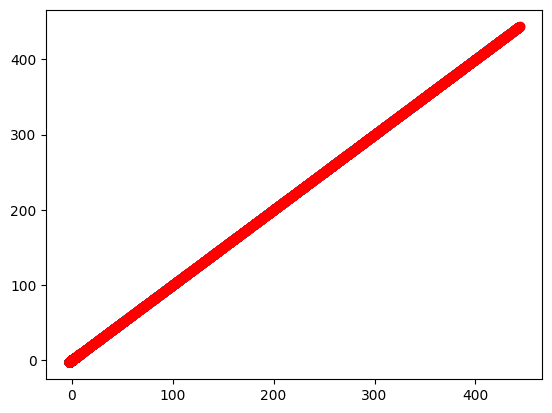

In [146]:
plt.scatter(X,Y)
plt.scatter(X_test_reg,y_pred_LR,color='red')


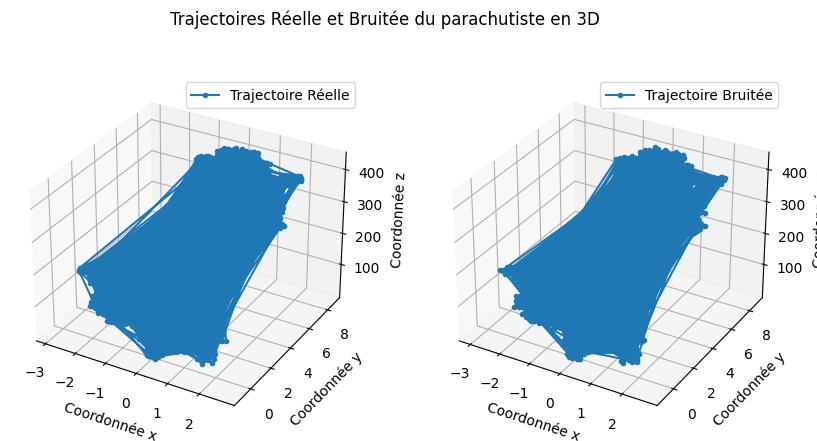

In [165]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ay = fig.add_subplot(122, projection='3d')

# Trajectoire réelle
y_pred_LR_df = pd.DataFrame(y_pred_LR, columns=['Xpred', 'Ypred', 'Zpred'])
real_x_coords = y_pred_LR_df.iloc[:,0]
real_y_coords = y_pred_LR_df.iloc[:,1]
real_z_coords = y_pred_LR_df.iloc[:,2]
ax.plot(real_x_coords, real_y_coords, real_z_coords, marker='.', label='Trajectoire Réelle')

# Trajectoire bruitée
noisy_x_coords = X_test_reg.iloc[:,0]
noisy_y_coords = X_test_reg.iloc[:,1]
noisy_z_coords = X_test_reg.iloc[:,2]
ay.plot(noisy_x_coords, noisy_y_coords, noisy_z_coords, marker='.', label='Trajectoire Bruitée')

plt.suptitle('Trajectoires Réelle et Bruitée du parachutiste en 3D')
ax.set_xlabel('Coordonnée x')
ax.set_ylabel('Coordonnée y')
ax.set_zlabel('Coordonnée z')
ax.legend()

ay.set_xlabel('Coordonnée x')
ay.set_ylabel('Coordonnée y')
ay.set_zlabel('Coordonnée z')
ay.legend()
plt.show()

In [149]:
y_pred_test = model_LR.predict(data_test.drop(columns=['Xreel', 'Yreel', 'Zreel']))

In [150]:
data_test

,Xreel,Yreel,Zreel,Xbruit,Ybruit,Zbruit
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.005012,-0.048252,0.065712,0.008921,0.109957,0.183874
2,-0.054071,0.021087,0.069550,-0.022193,0.089650,0.007788
3,0.011177,0.089479,0.083392,0.011897,0.185096,0.037997
4,-0.057330,0.122568,0.151799,-0.014952,-0.007062,0.306812
...,...,...,...,...,...,...
716,-2.035022,0.705944,30.822661,-1.994550,0.726012,30.765891
717,-2.074151,0.647171,30.884064,-2.097067,0.737197,30.982976
718,-2.095146,0.625036,30.925513,-2.221185,0.675467,30.952662
719,-2.162193,0.603093,30.968566,-2.333618,0.490001,31.061265


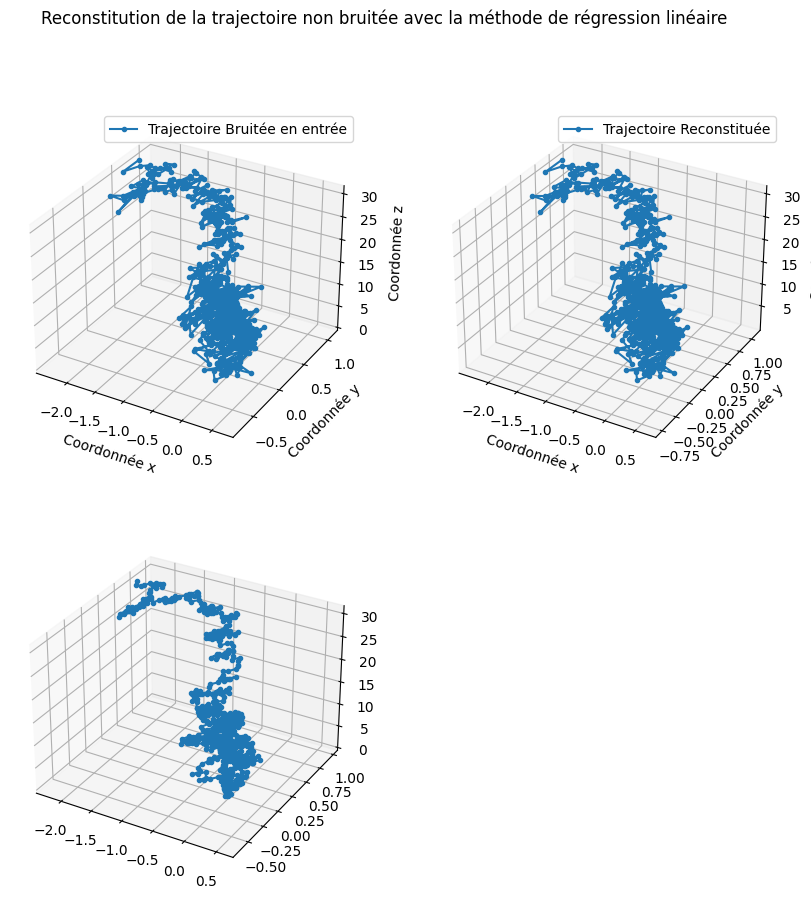

In [151]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))
figure, axes = fig.subplots(nrows=2, ncols=2)

# Trajectoire bruitée
ax1 = plt.subplot(2,2,1, projection='3d')
noisy_x_coords = data_test.iloc[:,3]
noisy_y_coords = data_test.iloc[:,4]
noisy_z_coords = data_test.iloc[:,5]

plt.plot(noisy_x_coords, noisy_y_coords, noisy_z_coords, marker='.', label='Trajectoire Bruitée en entrée')
ax1.set_xlabel('Coordonnée x')
ax1.set_ylabel('Coordonnée y')
ax1.set_zlabel('Coordonnée z')
ax1.legend()

# Trajectoire reconstituée
ax2 = plt.subplot(2,2,2, projection='3d')
y_test_df = pd.DataFrame(y_pred_test, columns=['Xpred', 'Ypred', 'Zpred'])
pred_x_coords = y_test_df.iloc[:,0]
pred_y_coords = y_test_df.iloc[:,1]
pred_z_coords = y_test_df.iloc[:,2]
plt.plot(pred_x_coords, pred_y_coords, pred_z_coords, marker='.', label='Trajectoire Reconstituée')
ax2.set_xlabel('Coordonnée x')
ax2.set_ylabel('Coordonnée y')
ax2.set_zlabel('Coordonnée z')
ax2.legend()

# Trajectoire réelle
ax3 = plt.subplot(2,2,2, projection='3d')
plt.subplot(2,2,3, projection='3d')
real_x_coords = data_test.iloc[:,0]
real_y_coords = data_test.iloc[:,1]
real_z_coords = data_test.iloc[:,2]
plt.plot(real_x_coords, real_y_coords, real_z_coords, marker='.', label='Trajectoire Reconstituée')
ax3.set_xlabel('Coordonnée x')
ax3.set_ylabel('Coordonnée y')
ax3.set_zlabel('Coordonnée z')
ax3.legend()

plt.suptitle('Reconstitution de la trajectoire non bruitée avec la méthode de régression linéaire')

plt.show()

In [152]:
print(y_test_df, data_test)


        Xpred     Ypred      Zpred
0   -0.001944 -0.005060   0.003940
1    0.007391  0.103609   0.187628
2   -0.023446  0.083307   0.011561
3    0.010708  0.177778   0.041617
4   -0.016780 -0.012054   0.310763
..        ...       ...        ...
716 -1.972201  0.706277  30.768318
717 -2.073491  0.716692  30.985344
718 -2.196463  0.654910  30.955084
719 -2.308497  0.471074  31.063967
720 -2.303388  0.757918  31.090092

[721 rows x 3 columns]         Xreel     Yreel      Zreel    Xbruit    Ybruit     Zbruit
0    0.000000  0.000000   0.000000  0.000000  0.000000   0.000000
1    0.005012 -0.048252   0.065712  0.008921  0.109957   0.183874
2   -0.054071  0.021087   0.069550 -0.022193  0.089650   0.007788
3    0.011177  0.089479   0.083392  0.011897  0.185096   0.037997
4   -0.057330  0.122568   0.151799 -0.014952 -0.007062   0.306812
..        ...       ...        ...       ...       ...        ...
716 -2.035022  0.705944  30.822661 -1.994550  0.726012  30.765891
717 -2.074151  0.647171  30.

# **Polynomial regression**

In [154]:
from sklearn.model_selection import train_test_split
# Assuming your target column is named 'target_column'
data_regression = data_normalized_with_label.copy()

# Split the data into features (X) and target variable (y)
X_reg = data_regression.drop(columns=['Xreel', 'Yreel', 'Zreel'])
Y_reg = data_regression.drop(columns=['Xbruit', 'Ybruit', 'Zbruit'])

# Split the data into training and testing sets
X = data.iloc[:,3:6] #bruitee
Y = data.iloc[:,0:3] #reelle
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, Y, test_size=0.3)

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create feature, feature**2, feature**3 columns depending on the degree wanted
degree = 5
polynomial = PolynomialFeatures(degree)
X_train_poly = polynomial.fit_transform(X_train_reg)
X_test_poly = polynomial.transform(X_test_reg)

# train the model
model_PR = LinearRegression()
model_PR.fit(X_train_poly, y_train_reg)

# Predict and evaluate
y_predicted = model_PR.predict(X_test_poly)
MSE_test_poly = mean_squared_error(y_test_reg, y_predicted)

print('Mean Squared Error on the testing set :' +str(MSE_test_poly))

Mean Squared Error on the testing set :0.009545221116951934


In [168]:
data_test_all_degrees = polynomial.transform(data_test.drop(columns=['Xreel', 'Yreel', 'Zreel']))
y_pred_test = model_PR.predict(data_test_all_degrees)

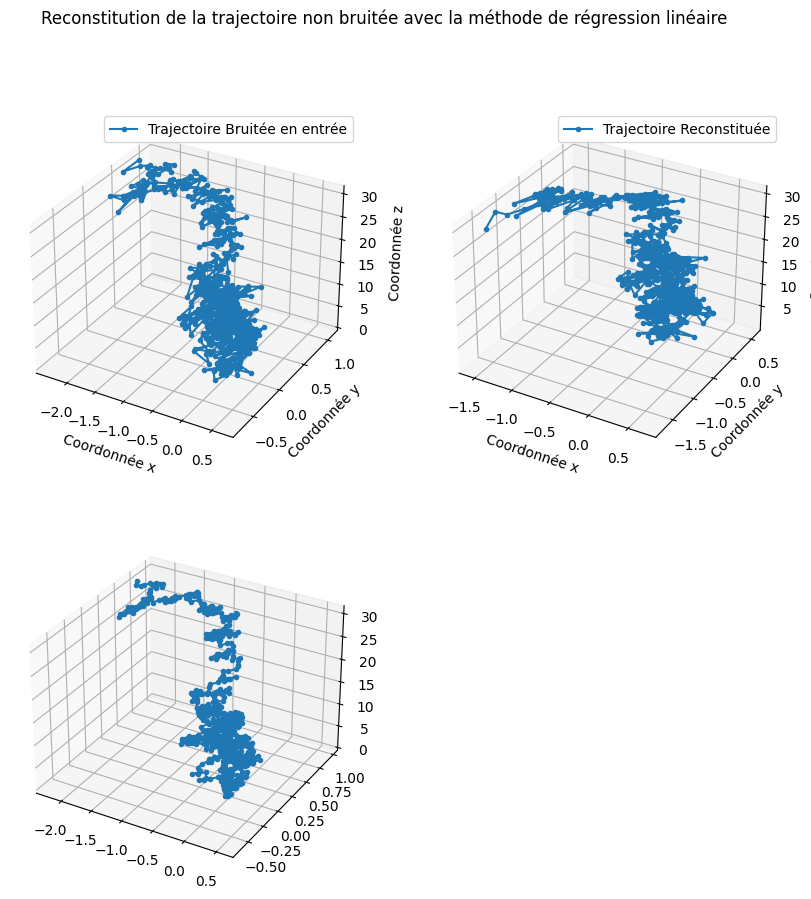

In [169]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))
figure, axes = fig.subplots(nrows=2, ncols=2)

# Trajectoire bruitée
ax1 = plt.subplot(2,2,1, projection='3d')
noisy_x_coords = data_test.iloc[:,3]
noisy_y_coords = data_test.iloc[:,4]
noisy_z_coords = data_test.iloc[:,5]

plt.plot(noisy_x_coords, noisy_y_coords, noisy_z_coords, marker='.', label='Trajectoire Bruitée en entrée')
ax1.set_xlabel('Coordonnée x')
ax1.set_ylabel('Coordonnée y')
ax1.set_zlabel('Coordonnée z')
ax1.legend()

# Trajectoire reconstituée
ax2 = plt.subplot(2,2,2, projection='3d')
y_test_df = pd.DataFrame(y_pred_test, columns=['Xpred', 'Ypred', 'Zpred'])
pred_x_coords = y_test_df.iloc[:,0]
pred_y_coords = y_test_df.iloc[:,1]
pred_z_coords = y_test_df.iloc[:,2]
plt.plot(pred_x_coords, pred_y_coords, pred_z_coords, marker='.', label='Trajectoire Reconstituée')
ax2.set_xlabel('Coordonnée x')
ax2.set_ylabel('Coordonnée y')
ax2.set_zlabel('Coordonnée z')
ax2.legend()

# Trajectoire réelle
ax3 = plt.subplot(2,2,2, projection='3d')
plt.subplot(2,2,3, projection='3d')
real_x_coords = data_test.iloc[:,0]
real_y_coords = data_test.iloc[:,1]
real_z_coords = data_test.iloc[:,2]
plt.plot(real_x_coords, real_y_coords, real_z_coords, marker='.', label='Trajectoire Reconstituée')
ax3.set_xlabel('Coordonnée x')
ax3.set_ylabel('Coordonnée y')
ax3.set_zlabel('Coordonnée z')
ax3.legend()

plt.suptitle('Reconstitution de la trajectoire non bruitée avec la méthode de régression linéaire')

plt.show()

In [170]:
print(y_test_df, data_test)


        Xpred     Ypred      Zpred
0   -0.032988 -0.014689   0.015385
1   -0.008313  0.095282   0.189128
2   -0.037362  0.069480   0.014151
3    0.006866  0.168860   0.036660
4   -0.044541 -0.024389   0.323085
..        ...       ...        ...
716 -1.218250 -0.882290  30.721119
717 -1.275086 -1.098998  30.935026
718 -1.372413 -1.310571  30.902454
719 -1.512376 -1.324357  31.017989
720 -1.383086 -1.734483  31.034059

[721 rows x 3 columns]         Xreel     Yreel      Zreel    Xbruit    Ybruit     Zbruit
0    0.000000  0.000000   0.000000  0.000000  0.000000   0.000000
1    0.005012 -0.048252   0.065712  0.008921  0.109957   0.183874
2   -0.054071  0.021087   0.069550 -0.022193  0.089650   0.007788
3    0.011177  0.089479   0.083392  0.011897  0.185096   0.037997
4   -0.057330  0.122568   0.151799 -0.014952 -0.007062   0.306812
..        ...       ...        ...       ...       ...        ...
716 -2.035022  0.705944  30.822661 -1.994550  0.726012  30.765891
717 -2.074151  0.647171  30.